# 2.2 Model comparison

So how do we know if a model is good? The PCNtoolkit provides us with some useful statistics for fitted models, but those aren't always as unequivocal as we would like. Luckily, for HBR models, there is a sound way to rank models, based on the WAIC. This technique allows us to configure and fit several models, and choose which one to use based on their ranking. This way, we can informatively compare models with different covariates, batch effects, likelihoods and prior settings. 


## 2.2.1 Pathological example

Here we synthesize a problematic dataset that we will use to demonstrate the inadequacy of the model statistics to show which model is best. 

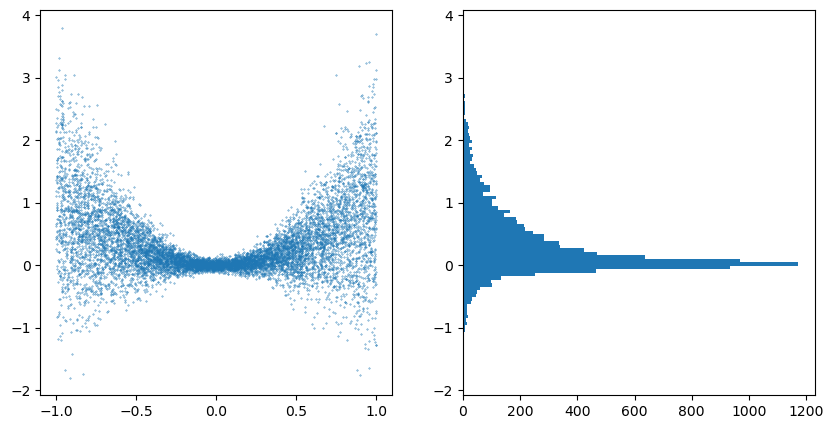

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
n_samples = 10000
x = np.random.uniform(-1, 1, n_samples)
y1 = np.random.normal(0, 1, n_samples)*(x**2+0.05) + x**2
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(x, y1,s=0.1)
ax[1].hist(x = y1, orientation="horizontal", bins=100)
plt.show()

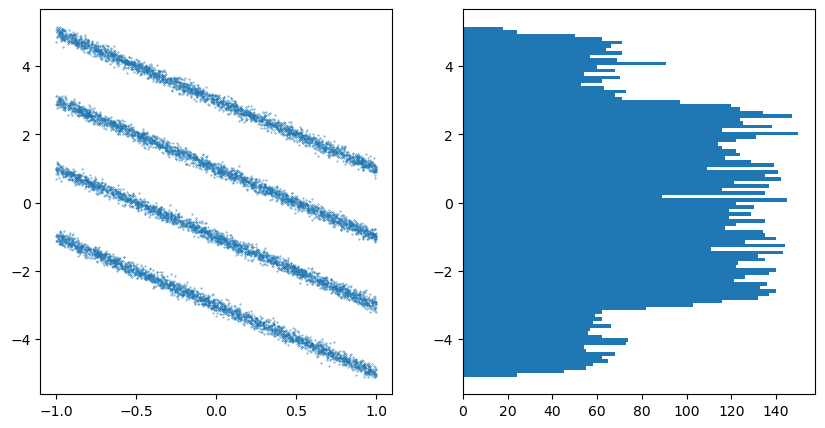

In [57]:
n_bins = 4
be1 = np.repeat(np.arange(n_bins), n_samples/n_bins)
y2 = (-x + be1 + np.random.randn(n_samples)*0.05 - 1.5)*2
fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(x, y2,s=0.1 )
ax[1].hist(x = y2, orientation="horizontal", bins=100)
plt.show()

{0: np.int64(0), 1: np.int64(2), 2: np.int64(1), 3: np.int64(3)}


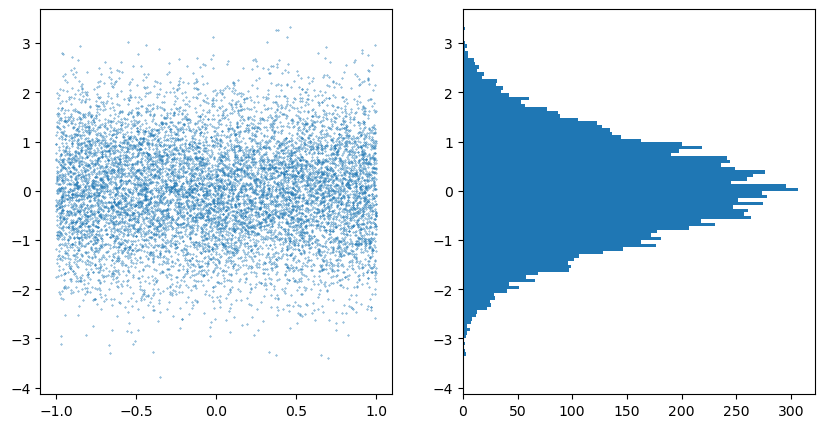

In [59]:
np.random.seed(41)
y3 = np.random.randn(n_samples)
y3.sort()
n_bins = 4
xsort = np.argsort(x)
y1 = y1[xsort]
y2 = y2[xsort]
be1 = be1[xsort]
x = x[xsort]

new_y3 = np.zeros(n_samples)
shuffle = {i:v for i,v in enumerate(np.random.permutation(n_bins))}
print(shuffle)
for j in range(n_bins):
    section = y3[be1==j]
    np.random.shuffle(section)
    new_y3[be1==shuffle[j]] = section
y3 = new_y3

fig,ax = plt.subplots(1,2, figsize=(10,5))
ax[0].scatter(x, y3, label='y3', s=0.1)
ax[1].hist(x = y3, orientation="horizontal", bins=100)
plt.show()
    


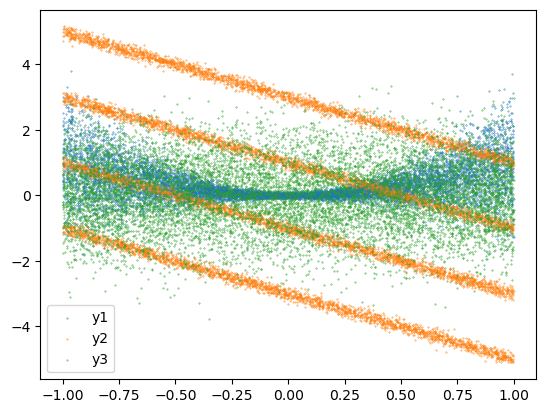

In [55]:
plt.scatter(x, y1, label='y1', s=0.1)
plt.scatter(x, y2, label='y2', s=0.1)
plt.scatter(x, y3, label='y3', s=0.1)
plt.legend()
plt.show()